### Import Libraries

### Set up data paths and read in files

In [27]:
import pandas as pd
from pathlib import Path
from IPython.display import display
import requests

from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.gis import GIS

In [28]:
data_dir = Path(r"your_path/to/data")
code_filename = "airport-codes_csv.csv"

airport_file = data_dir / code_filename

### Inspect airport code data

In [29]:
airport_df = pd.read_csv(airport_file)

In [30]:
airport_df.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


### Get information about the DataFrame

In [32]:
type(airport_df)

pandas.core.frame.DataFrame

In [31]:
airport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57421 entries, 0 to 57420
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ident         57421 non-null  object 
 1   type          57421 non-null  object 
 2   name          57421 non-null  object 
 3   elevation_ft  49608 non-null  float64
 4   continent     28978 non-null  object 
 5   iso_country   57175 non-null  object 
 6   iso_region    57421 non-null  object 
 7   municipality  51527 non-null  object 
 8   gps_code      41561 non-null  object 
 9   iata_code     9225 non-null   object 
 10  local_code    30030 non-null  object 
 11  coordinates   57421 non-null  object 
dtypes: float64(1), object(11)
memory usage: 5.3+ MB


### Transform the coordinates string to the necessary latitude and longitude decimal degree columns

In [33]:
airport_df.columns

Index(['ident', 'type', 'name', 'elevation_ft', 'continent', 'iso_country',
       'iso_region', 'municipality', 'gps_code', 'iata_code', 'local_code',
       'coordinates'],
      dtype='object')

In [34]:
airport_df.coordinates

0             -74.93360137939453, 40.07080078125
1                         -101.473911, 38.704022
2                    -151.695999146, 59.94919968
3          -86.77030181884766, 34.86479949951172
4                            -91.254898, 35.6087
                          ...                   
57416                        122.3586, 40.542524
57417     123.49600219726562, 41.784400939941406
57418                          1.4825, 51.894444
57419    47.296388888900005, -11.584277777799999
57420                      130.270556, 30.784722
Name: coordinates, Length: 57421, dtype: object

In [35]:
type(airport_df.coordinates)

pandas.core.series.Series

In [36]:
airport_df.coordinates[29]

'-86.41670227050781, 43.94940185546875'

In [37]:
type(airport_df.coordinates[29])

str

In [ ]:
airport_df.coordinates.to_list()

In [39]:
for c in airport_df.coordinates.to_list()[:5]:
    print(f"{c.split(',')[0]:20}{' '*10}{c.split(',')[1]}")

-74.93360137939453             40.07080078125
-101.473911                    38.704022
-151.695999146                 59.94919968
-86.77030181884766             34.86479949951172
-91.254898                     35.6087


### Split coordinates column into new columns of float values for lat,long

In [40]:
long_vals = [float(coords.split(",")[0]) for coords in airport_df.coordinates.to_list()]
lat_vals = [float(coords.split(",")[1]) for coords in airport_df.coordinates.to_list()]

In [41]:
airport_df["longitude"] = long_vals
airport_df["latitude"] = lat_vals

In [42]:
airport_df.drop(columns="coordinates", inplace=True)

In [43]:
airport_df.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,longitude,latitude
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,-74.933601,40.070801
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,-101.473911,38.704022
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,-151.695999,59.949200
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,-86.770302,34.864799
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,-91.254898,35.608700


### Write out data to a new file

In [44]:
airport_df.to_csv(path_or_buf=data_dir / "airport_codes_ed.csv",
                  index=False,
                  index_label=False)

### Read into a DataFrame

In [45]:
airport_ed = pd.read_csv(data_dir / "airport_codes_ed.csv")
airport_ed.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,longitude,latitude
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,-74.933601,40.070801
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,-101.473911,38.704022
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,-151.695999,59.949200
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,-86.770302,34.864799
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,-91.254898,35.608700


In [46]:
airport_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57421 entries, 0 to 57420
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ident         57421 non-null  object 
 1   type          57421 non-null  object 
 2   name          57421 non-null  object 
 3   elevation_ft  49608 non-null  float64
 4   continent     28978 non-null  object 
 5   iso_country   57175 non-null  object 
 6   iso_region    57421 non-null  object 
 7   municipality  51527 non-null  object 
 8   gps_code      41561 non-null  object 
 9   iata_code     9225 non-null   object 
 10  local_code    30030 non-null  object 
 11  longitude     57421 non-null  float64
 12  latitude      57421 non-null  float64
dtypes: float64(3), object(10)
memory usage: 5.7+ MB


In [47]:
airport_ed.type.value_counts()

small_airport     34808
heliport          12028
medium_airport     4537
closed             4378
seaplane_base      1030
large_airport       616
balloonport          24
Name: type, dtype: int64

<AxesSubplot:>

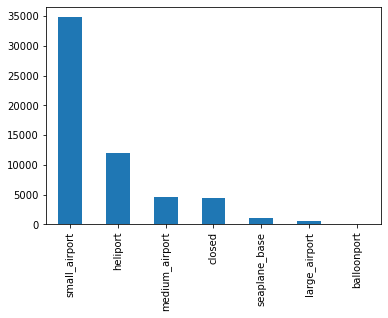

In [48]:
airport_ed.type.value_counts().plot(kind="bar")

### Explore the DataFrame

In [49]:
type(airport_ed)

pandas.core.frame.DataFrame

In [50]:
type(airport_ed.spatial)

arcgis.features.geo._accessor.GeoAccessor

In [51]:
airport_ed.shape

(57421, 13)

In [52]:
iata_df = airport_ed[airport_ed.iata_code.notnull()]
iata_df.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,longitude,latitude
223,03N,small_airport,Utirik Airport,4.0,OC,MH,MH-UTI,Utirik Island,K03N,UTK,03N,169.852005,11.222000
441,07FA,small_airport,Ocean Reef Club Airport,8.0,NaN,US,US-FL,Key Largo,07FA,OCA,07FA,-80.274803,25.325399
598,0AK,small_airport,Pilot Station Airport,305.0,NaN,US,US-AK,Pilot Station,NaN,PQS,0AK,-162.899994,61.934601
677,0CO2,small_airport,Crested Butte Airpark,8980.0,NaN,US,US-CO,Crested Butte,0CO2,CSE,0CO2,-106.928341,38.851918
1094,0TE7,small_airport,LBJ Ranch Airport,1515.0,NaN,US,US-TX,Johnson City,0TE7,JCY,0TE7,-98.622498,30.251801


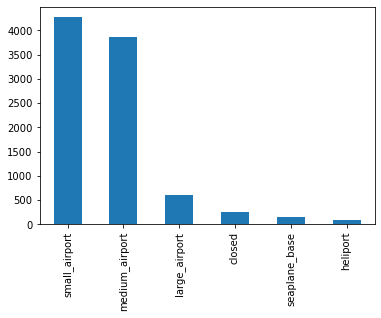

In [62]:
iata_df.type.value_counts().plot(kind="bar");

### Reset the row index

In [54]:
iata_df.reset_index(inplace=True)

### Create the spatially enabled dataframe from the csv

In [55]:
iata_sedf = pd.DataFrame.spatial.from_xy(df=iata_df,
                                         x_column="longitude",
                                         y_column="latitude",
                                         sr=4326)

C:\Users\username\path\on\your_system\conda\envs\arcgispro-py3-clone\lib\site-packages\arcgis\features\geo\_io\fileops.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SHAPE"] = GeoArray(ags_geom)


In [56]:
iata_sedf.head()

,index,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,longitude,latitude,SHAPE
0,223,03N,small_airport,Utirik Airport,4.0,OC,MH,MH-UTI,Utirik Island,K03N,UTK,03N,169.852005,11.222000,"{""spatialReference"": {""wkid"": 4326}, ""x"": 169...."
1,441,07FA,small_airport,Ocean Reef Club Airport,8.0,NaN,US,US-FL,Key Largo,07FA,OCA,07FA,-80.274803,25.325399,"{""spatialReference"": {""wkid"": 4326}, ""x"": -80...."
2,598,0AK,small_airport,Pilot Station Airport,305.0,NaN,US,US-AK,Pilot Station,NaN,PQS,0AK,-162.899994,61.934601,"{""spatialReference"": {""wkid"": 4326}, ""x"": -162..."
3,677,0CO2,small_airport,Crested Butte Airpark,8980.0,NaN,US,US-CO,Crested Butte,0CO2,CSE,0CO2,-106.928341,38.851918,"{""spatialReference"": {""wkid"": 4326}, ""x"": -106..."
4,1094,0TE7,small_airport,LBJ Ranch Airport,1515.0,NaN,US,US-TX,Johnson City,0TE7,JCY,0TE7,-98.622498,30.251801,"{""spatialReference"": {""wkid"": 4326}, ""x"": -98...."


In [57]:
gis = GIS(profile="your_profile")

In [58]:
m1 = gis.map("United States")
m1

MapView(layout=Layout(height='400px', width='100%'))

In [59]:
m1.zoom = 4

In [60]:
m1.center = [39, -98]

In [61]:
iata_sedf.spatial.plot(m1)

True